In [5]:
from pipeline import *
data_directory = "small"
decimal_places=2
def confusion(val_true, val_pred, test_true, test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Create a figure with two subplots

    # Validation confusion matrix
    cm_val = confusion_matrix(np.array(val_true), np.array(val_pred), normalize='true')
    cm_val = np.around(cm_val, decimals=decimal_places)
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=np.array(class_labels))
    disp_val.plot(ax=axes[0], colorbar=False)
    axes[0].set_title("Validation Set")
    axes[0].set_xticklabels(class_labels, rotation=90)

    # Test confusion matrix
    cm_test = confusion_matrix(np.array(test_true), np.array(test_pred), normalize='true')
    cm_test = np.around(cm_test, decimals=decimal_places)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.array(class_labels))
    disp_test.plot(ax=axes[1], colorbar=False)
    axes[1].set_title("Test Set")
    axes[1].set_xticklabels(class_labels, rotation=90)

    plt.tight_layout()
    plt.show()
loss_function = nn.CrossEntropyLoss()

/Users/neema/miniconda3/envs/pytorch/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96714256 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/neema/miniconda3/envs/pytorch/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Accuracy: 0.63059
Test Loss: 1.15318


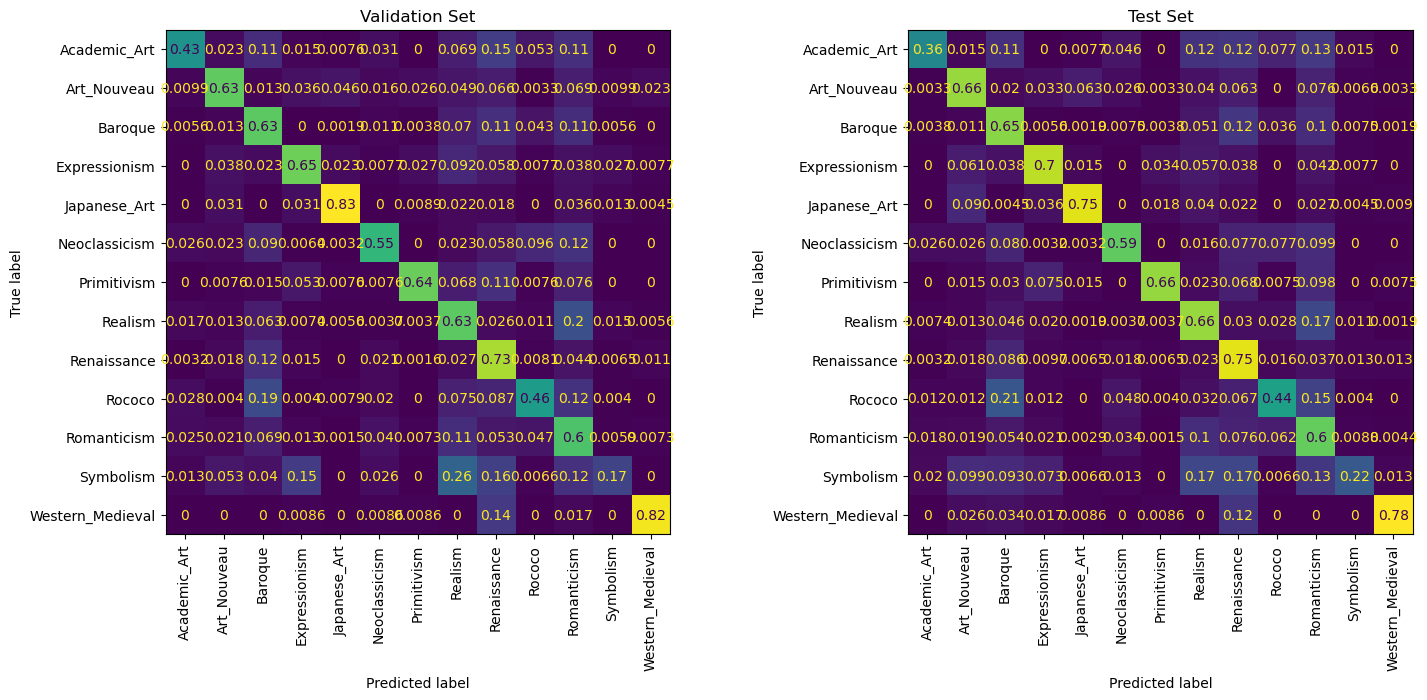

In [2]:
# Confusion Matrix metrics
test_true = []
test_pred = []
val_true = []
val_pred = []
train_loader, val_loader, test_loader = prepare_data()
model = create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=class_numbers, in_chans = 3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#continue finetuning
state_dict = torch.load("swin_transformer_finetuned.pth", map_location=device)
model.load_state_dict(state_dict)


test_acc = 0
test_loss = 0
running_test_correct = 0
running_test_loss = 0
running_val_loss = 0
running_val_correct = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        # total += labels.size(0)
        running_test_loss += loss_function(outputs,labels).item()
        running_test_correct += (predicted == labels).sum().item()
        test_true += labels.tolist()
        test_pred += predicted.tolist()

# Validation
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        # total += labels.size(0)
        running_val_loss += loss_function(outputs,labels).item()
        running_val_correct += (predicted == labels).sum().item()
        #print(predicted, labels)
        val_pred += predicted.tolist()
        val_true += labels.tolist()

        
test_acc = running_test_correct / len(test_loader.dataset) 
test_loss = running_test_loss / len(test_loader) 
print(f"Test Accuracy: {test_acc:.5f}\nTest Loss: {test_loss:.5f}")
confusion(val_true, val_pred, test_true, test_pred)

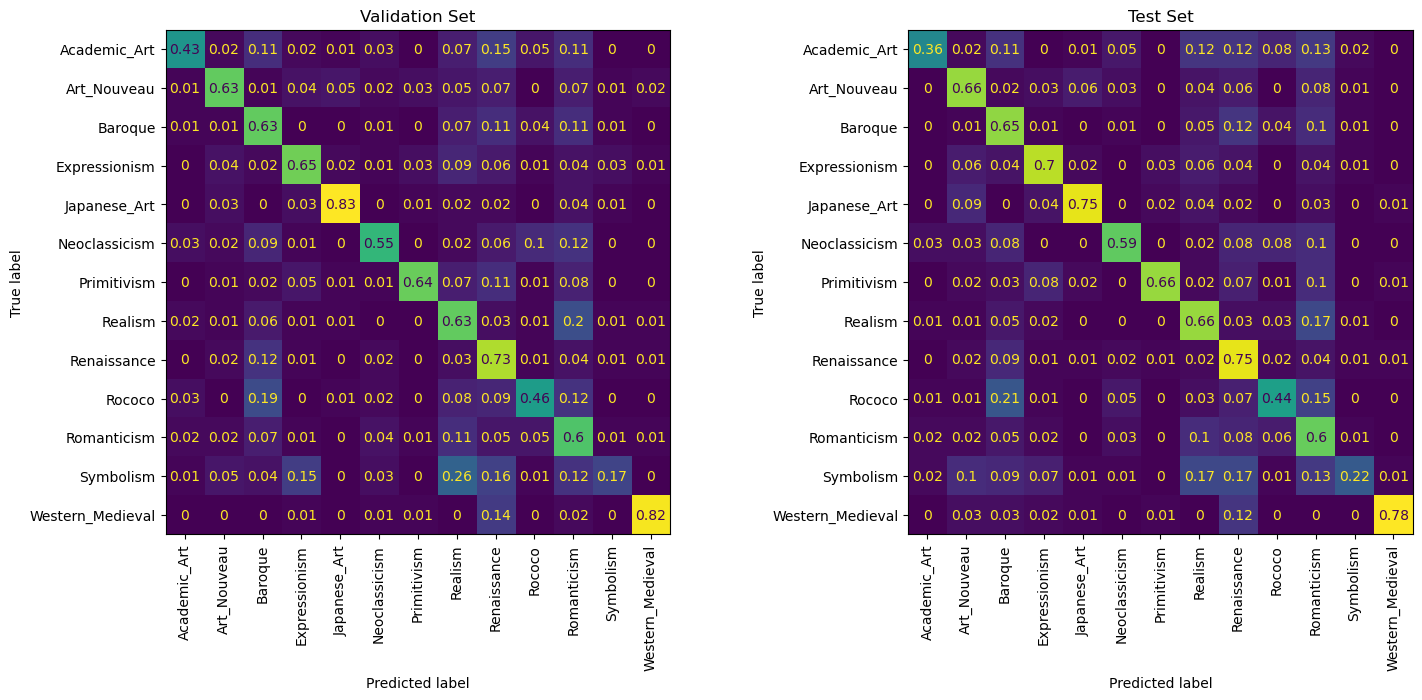

In [6]:
confusion(val_true, val_pred, test_true, test_pred)